In [127]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as sts
import pandas as pd
import statistics as stat
import numpy as np
import os
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Files to load
city_data_to_load = "Resources/city_data.csv" 
ride_data_to_load = "Resources/ride_data.csv"

In [128]:
#reading the csv file and checking them
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [129]:
#reading the csv file and checking them
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [130]:
# cheaking to see is city_data needs cleaning but counting rows and checking for null values
print(city_data_df.count())
print(city_data_df.isnull().sum())
print(city_data_df.dtypes)
# seeing the unique values under type columb and counting how many rows are under each category
print(city_data_df["type"].unique())
print(sum(city_data_df["type"]=="Urban"))
print(sum(city_data_df["type"]=="Suburban"))
print(sum(city_data_df["type"]=="Rural"))


city            120
driver_count    120
type            120
dtype: int64
city            0
driver_count    0
type            0
dtype: int64
city            object
driver_count     int64
type            object
dtype: object
['Urban' 'Suburban' 'Rural']
66
36
18


In [131]:
# cheaking to see is ride_data needs cleaning but counting rows and checking for null values
print(ride_data_df.count())
print(ride_data_df.isnull().sum())
print(ride_data_df.dtypes)

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64
city       0
date       0
fare       0
ride_id    0
dtype: int64
city        object
date        object
fare       float64
ride_id      int64
dtype: object


In [132]:
#merging the 2 dataframes by city
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [133]:
#creating Series out of the main df for each type of city
urban_city_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_city_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_city_df = pyber_data_df[pyber_data_df["type"]== "Rural"]
rural_city_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [134]:
# Get the number of rides for city.
urban_ride_count = urban_city_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_city_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_city_df.groupby(["city"]).count()["ride_id"]

urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [135]:
# Get average fare for each city in the type catagory.
urban_avg_fare = urban_city_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_city_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_city_df.groupby(["city"]).mean()["fare"]

In [136]:
# Get the average number of drivers for each city.
urban_drive_count = urban_city_df.groupby(["city"]).mean()["driver_count"]
rural_drive_count = rural_city_df.groupby(["city"]).mean()["driver_count"]
suburban_drive_count = suburban_city_df.groupby(["city"]).mean()["driver_count"]

<function matplotlib.pyplot.show(close=None, block=None)>

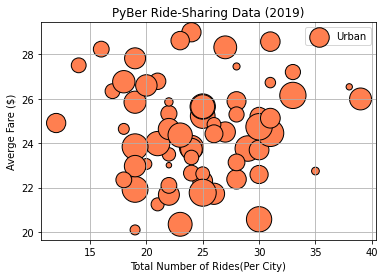

In [137]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s = [i * 10 for i in urban_drive_count], 
            color="coral", 
            label = "Urban",
            edgecolor="black")
plt.legend()
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Averge Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

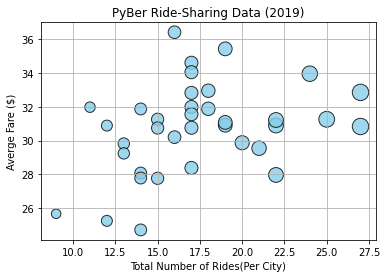

In [138]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s = [ i * 10 for i in suburban_ride_count],
            label = "Suburban",
            color = "#87CEEB",
            edgecolor= "black",
            alpha=0.8)
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Averge Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

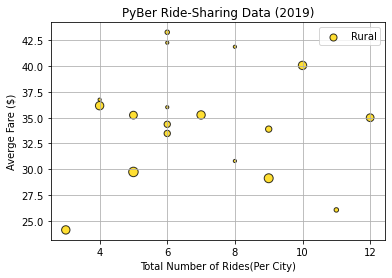

In [139]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s = [i * 10 for i in rural_drive_count],
            color = "gold",
            label = "Rural",
            edgecolor= "black",
            alpha=0.8)
plt.legend()
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Averge Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()
plt.show

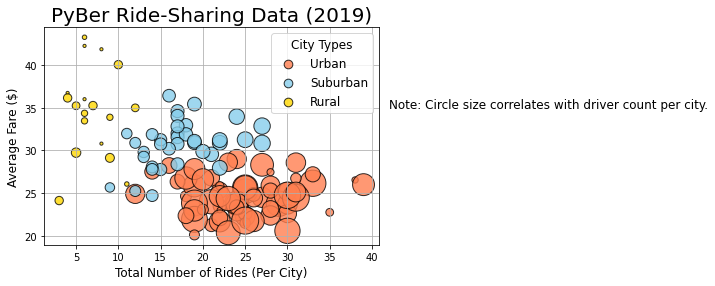

In [140]:
# Build the scatter charts for each city type.
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s = [i * 10 for i in urban_drive_count], 
            color="coral", 
            label = "Urban",
            edgecolor="black",
            alpha=0.8)
            
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s = [ i * 10 for i in suburban_ride_count],
            label = "Suburban",
            color = "#87CEEB",
            edgecolor= "black",
            alpha=0.8)

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s = [i * 10 for i in rural_drive_count],
            color = "gold",
            label = "Rural",
            edgecolor= "black",
            alpha=0.8)

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize= 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid()

#adding legend
# creating a legend
lgnd = plt.legend(fontsize = "12" , mode ="Expanded", scatterpoints = 1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#adding text to indicate circle size is driver count
plt.text(42,35, "Note: Circle size correlates with driver count per city.", fontsize="12" )
#SHOWING GRAPH
plt.show

# Save the figure.
plt.savefig("analysis/Fig1.png")

In [141]:
# Get summary statistics.
urban_city_df.describe()

# their are far more riders and drivers in urban districts while the mean fare is low

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [142]:
# Get summary statistics.
suburban_city_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [143]:
# Get summary statistics.
rural_city_df.describe()

# their are far fewer riders and drivers in urban districts while the mean is high

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [144]:
# Get summary statistics.
print(urban_ride_count.describe())
print(rural_ride_count.describe())
print(suburban_ride_count.describe())

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64
count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64
count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64


In [145]:
# Calculate the mean of the ride count for each city type.
(round(urban_ride_count.mean(),2),
round(suburban_ride_count.mean(),2),
round(rural_ride_count.mean(),2))

(24.62, 17.36, 6.94)

In [146]:
# Calculate the median of the ride count for each city type.
(round(urban_ride_count.median(),2),
round(suburban_ride_count.median(),2),
round(rural_ride_count.median(),2))

(24.0, 17.0, 6.0)

In [147]:
# Calculate the mode of the ride count for the cities.
(urban_ride_count.mode(),
suburban_ride_count.mode(),
rural_ride_count.mode())

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [148]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count:.2f}.")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [149]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")
median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count:.2f}.")
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.00.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [150]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")
median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count:.2f}.")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.00.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [151]:
# Get the fares for the urban cities.
urban_fare = urban_city_df["fare"]
suburban_fare = suburban_city_df["fare"]
rural_fare = rural_city_df["fare"]

In [152]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fare = np.mean(urban_fare)
print(f"The mean fare price for urban trips is ${mean_urban_fare:.2f}.")

median_urban_fare = np.median(urban_fare)
print(f"The median fare price for urban trips is ${median_urban_fare:.2f}.")

mode_urban_fare = sts.mode(urban_fare)
print(f"The mode fare price for urban trips is {mode_urban_fare}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [153]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fare = np.mean(suburban_fare)
print(f"The mean fare price for suburban trips is ${mean_suburban_fare:.2f}.")

median_suburban_fare = np.median(suburban_fare)
print(f"The median fare price for suburban trips is ${median_suburban_fare:.2f}.")

mode_suburban_fare = sts.mode(suburban_fare)
print(f"The mode fare price for suburban trips is {mode_suburban_fare}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [154]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fare = np.mean(rural_fare)
print(f"The mean fare price for rural trips is ${mean_rural_fare:.2f}.")

median_rural_fare = np.median(rural_fare)
print(f"The median fare price for rural trips is ${median_rural_fare:.2f}.")

mode_rural_fare = sts.mode(rural_fare)
print(f"The mode fare price for rural trips is {mode_rural_fare}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [155]:
# Get the driver count data from the urban cities.
urban_driver = urban_city_df["driver_count"]
suburban_driver = suburban_city_df["driver_count"]
rural_driver = rural_city_df["driver_count"]


In [156]:
# Calculate the measures of central tendency for the average driver for the urban cities.
mean_urban_drive = round(np.mean(urban_driver))
print(f"The mean amount of urban drivers are {mean_urban_drive:.2f}.")

median_urban_drive = np.median(urban_driver)
print(f"The median amount of urban drivers are {median_urban_drive:.2f}.")

mode_urban_drive = sts.mode(urban_driver)
print(f"The mode amount of urban drivers are {mode_urban_drive}.")

The mean amount of urban drivers are 37.00.
The median amount of urban drivers are 37.00.
The mode amount of urban drivers are ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [157]:
# Calculate the measures of central tendency for the average driver for the suburban cities.
mean_suburban_drive = round(np.mean(suburban_driver))
print(f"The mean amount of suburban drivers are {mean_suburban_drive:.2f}.")

median_suburban_drive = np.median(suburban_driver)
print(f"The median amount of suburban drivers are {median_suburban_drive:.2f}.")

mode_suburban_drive = sts.mode(suburban_driver)
print(f"The mode amount of suburban drivers are {mode_suburban_drive}.")

The mean amount of suburban drivers are 14.00.
The median amount of suburban drivers are 16.00.
The mode amount of suburban drivers are ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [158]:
# Calculate the measures of central tendency for the average driver for the rural cities.
mean_rural_drive = round(np.mean(rural_driver))
print(f"The mean amount of rural drivers are {mean_rural_drive:.2f}.")

median_rural_drive = np.median(rural_driver)
print(f"The median amount of rural drivers are {median_rural_drive:.2f}.")

mode_rural_drive = sts.mode(rural_driver)
print(f"The mode amount of rural drivers are {mode_rural_drive}.")

The mean amount of rural drivers are 4.00.
The median amount of rural drivers are 4.00.
The mode amount of rural drivers are ModeResult(mode=array([1], dtype=int64), count=array([32])).


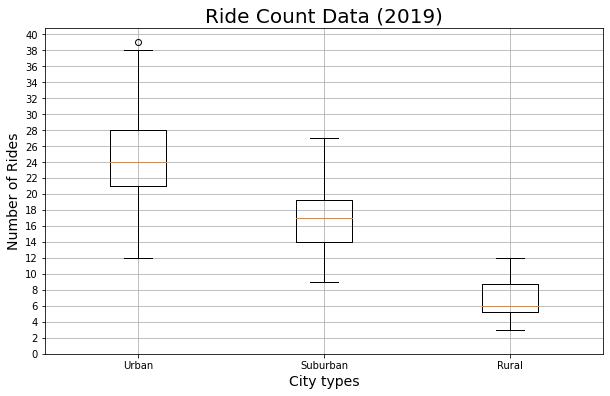

In [159]:
# Create a box-and-whisker plot for the urban cities ride count.
x_lables = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels=x_lables)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City types", fontsize=14)
ax.set_yticks(np.arange(0,41, step=2.0))
ax.grid()
plt.show
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [160]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


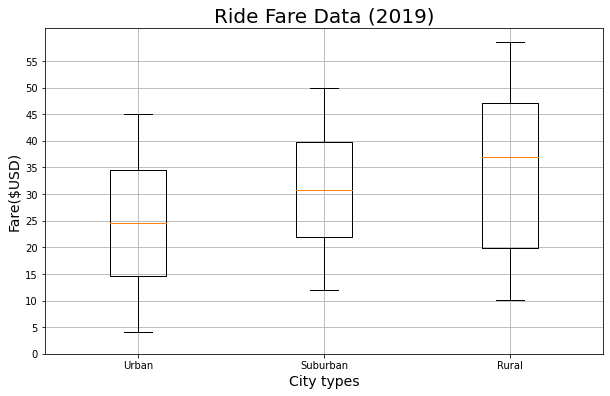

In [161]:
# Create a box-and-whisker plot for the urban fare data.
x_lables = ["Urban", "Suburban","Rural"]
fare_cities = [urban_fare, suburban_fare, rural_fare]
fig, ax=plt.subplots(figsize=(10,6))
ax.boxplot(fare_cities, labels = x_lables)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare($USD)', fontsize=14)
ax.set_xlabel("City types", fontsize=14)
ax.set_yticks(np.arange(0,60, step = 5.0))
ax.grid()
plt.show

# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

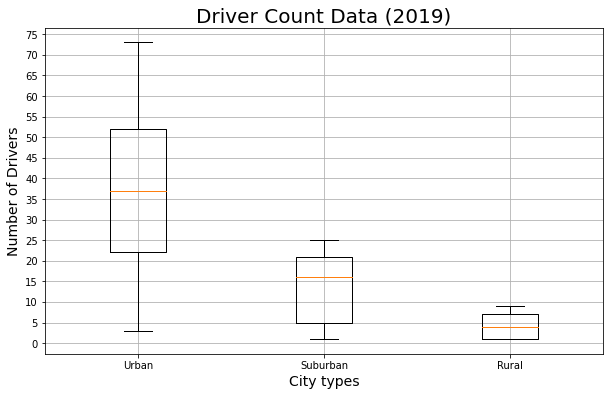

In [162]:
# Create the box-and-whisker plot for the urban driver count data.
x_lables = ["Urban", "Suburban","Rural"]
driver_city = [urban_driver, suburban_driver, rural_driver]
fig, ax=plt.subplots(figsize = (10,6))
ax.boxplot(driver_city, labels = x_lables)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City types", fontsize=14)
ax.set_yticks(np.arange(0,80, step=5.0))
ax.grid()
plt.show

# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [163]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * (pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum())
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

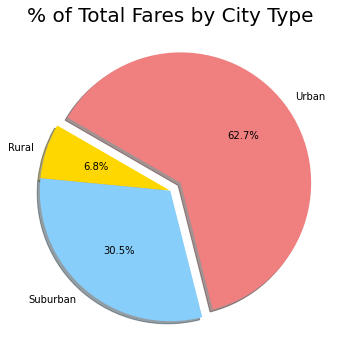

In [164]:
# Build the percentage of fares by city type pie chart.
city_types = ["Rural", "Suburban", "Urban"]
colors_pie = ["gold", "lightskyblue", "lightcoral"]
plt.subplots(figsize=(10,6))
plt.pie(type_percents, 
        labels = city_types, 
        colors = colors_pie, 
        explode=[0,0,0.1], 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=150)
plt.title("% of Total Fares by City Type", fontsize=20)
#change the default size from 10, 14
mpl.rcParams["font.size"] = 14
#saave fig
plt.savefig("analysis/Fig5.png")

plt.show()

In [165]:
ride_percents = 100*(pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count())
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

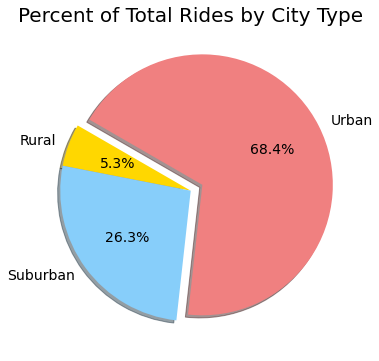

In [166]:
plt.subplots(figsize=(10,6))
plt.pie(ride_percents, 
        labels = city_types, 
        colors = colors_pie,
        explode = [0,0,0.1],
        autopct = "%1.1f%%",
        shadow = True, 
        startangle = 150)
plt.title("Percent of Total Rides by City Type", fontsize = 20)

plt.savefig("analysis/Fig6.png")

plt.show

In [167]:
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

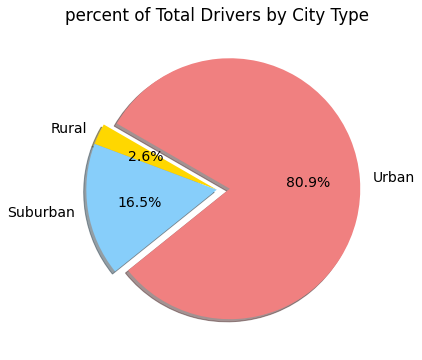

In [168]:
plt.subplots(figsize = (10,6))
plt.pie(driver_percents , 
        labels = city_types , 
        colors= colors_pie,
        explode = [0,0,0.1],
        autopct = "%1.1f%%",
        shadow = True,
        startangle = 150)
plt.title("percent of Total Drivers by City Type")
mpl.rcParams["font.size"]=14
plt.savefig("analysis/Fig7.png")
plt.show